In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image


physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU is enabled for training.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. Training will be performed on CPU.")


(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

GPU is enabled for training.
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8535 - loss: 0.5100 - val_accuracy: 0.9743 - val_loss: 0.0874
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9808 - loss: 0.0625 - val_accuracy: 0.9848 - val_loss: 0.0494
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9875 - loss: 0.0413 - val_accuracy: 0.9888 - val_loss: 0.0389
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9905 - loss: 0.0325 - val_accuracy: 0.9882 - val_loss: 0.0390
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9897 - val_loss: 0.0399
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9948 - loss: 0.0176 - val_accuracy: 0.9902 - val_loss: 0.0344
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9910 - val_loss: 0.0358
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9975 - loss: 0.0094 - val_accuracy: 0

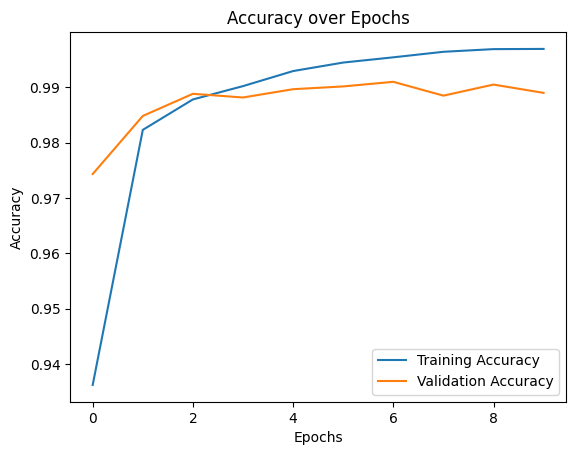

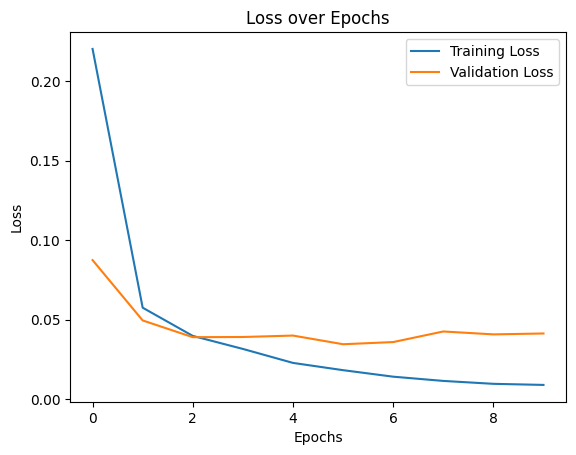

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


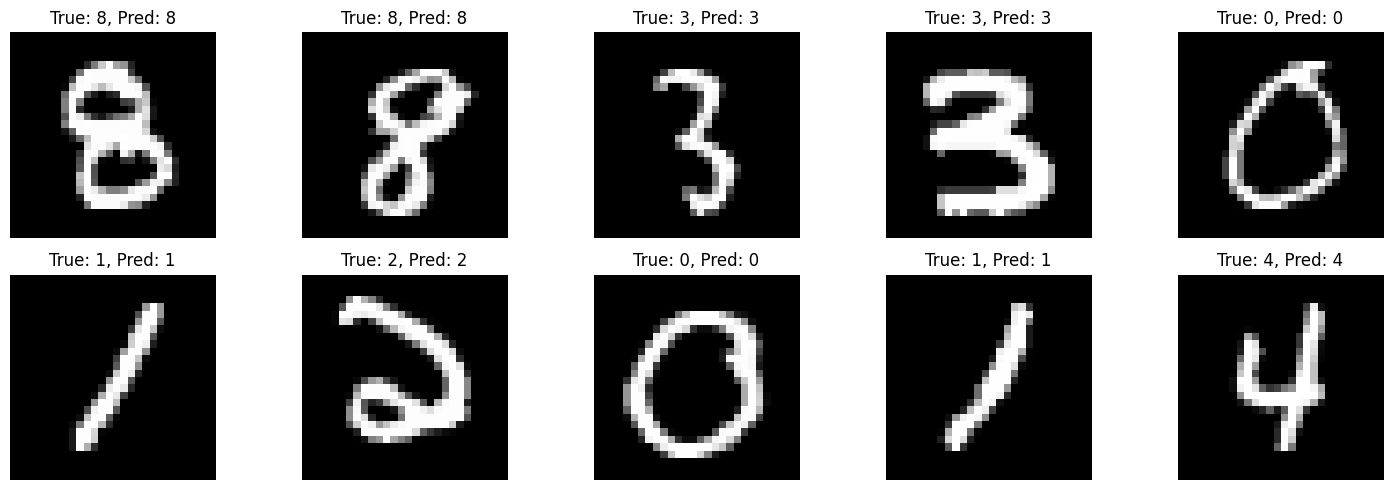

In [2]:

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)


num_images_to_display = 10
plt.figure(figsize=(15, 5))

for i in range(num_images_to_display):
    idx = random.randint(0, len(x_test) - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Save the model
model.save('mnist_handwritten_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


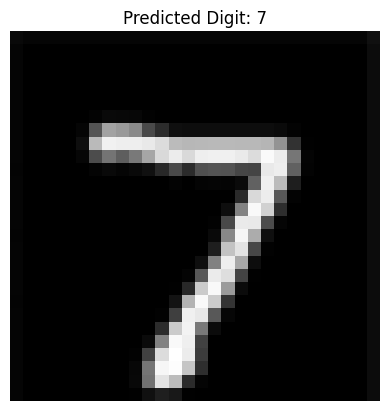

7

In [4]:
def recognize_handwritten_digit(image_path, model):

    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img, dtype='float32') / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)


    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)


    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

    return predicted_digit

# Example usage
recognize_handwritten_digit('/content/test.png', model)